# Results of the pipeline

In [1]:
import pickle
from autoembedding.results_manager import results2table
from pathlib import Path

# PATH = "./results/phylogenetic_results_emoglobina.pkl"
# PATH = "./results/enrichment_results_emoglobina.pkl"

# PATH = "./results/phylogenetic_results_topo.pkl"
# PATH = "./results/enrichment_results_topo.pkl"

# PATH = "./results/phylogenetic_results_batterio.pkl"
# PATH = "./results/enrichment_results_batterio.pkl"

# PATH = '/storagenfs/m.tolloso/BioEmbedding/results/phylogenetic_results_covid19.pkl'

PATH = '/storagenfs/m.tolloso/BioEmbedding/results/phylogenetic_results_hemoglobin.pkl'


results = pickle.load(open(PATH, "rb"))
r, best_lst = results2table(
    results, 
    embedders= [
        "dnabert", 
        "seqvec", 
        "prose", 
        "alphafold", 
        "esm"
        ],
    combiners = ["pca", "average", "sum", "max"],
    pcas = [ '10', '50', 'all'],
    metric="mean_adjusted_rand_score", 
    
    preferred_metric_embedding="euclidean", 
    preferred_method_embedding="average", 
    
    preferred_metric_gt="euclidean", # euclidean, average: equivalent to UPGMA when the gt is the distance matrix
    preferred_method_gt="average",
    
    preferred_edge_weight="jaccard",
    preferred_annotation="keywords"
)
r.to_latex("./latex_output.tex")
r

dnabert    seqvec     prose  alphafold       esm
combiner dimensional PCA                                                   
pca      10               0.495025  0.597449  0.591774   0.645528  0.661722
         50               0.558187  0.638786  0.629553   0.652953  0.692143
         all              0.558040  0.636085  0.601397   0.658730  0.689960
average  10               0.543685  0.566850  0.564211   0.611688  0.658008
         50               0.576672  0.624813  0.575517   0.647788  0.677998
         all              0.576856  0.627231  0.544174   0.654070  0.698900
sum      10               0.506024  0.574146  0.566467   0.635376  0.650035
         50               0.539094  0.618493  0.581521   0.661300  0.670518
         all              0.541318  0.616523  0.570925   0.666042  0.693109
max      10               0.444970  0.469091  0.579247   0.514537  0.652331
         50               0.635666  0.618161  0.663744   0.630101  0.721065
         all              0.625207  0.642382  0.632913   0.660067  0.709558

# Scores

In [2]:
# reverse the list, since the first element represent each point in its own cluster
best_lst = best_lst[::-1]

74


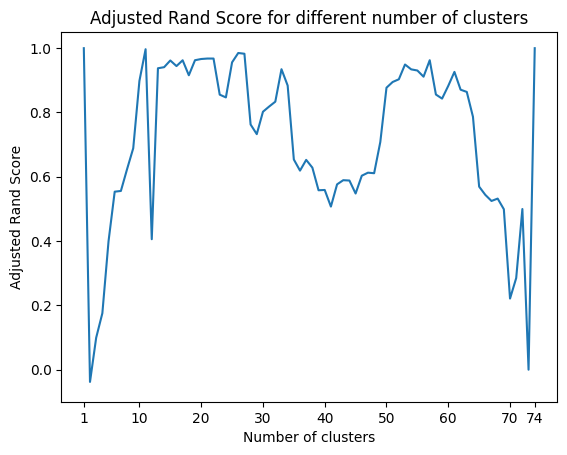

In [3]:
import matplotlib.pyplot as plt
import numpy as np


plt.xlabel("Number of clusters")
plt.ylabel("Adjusted Rand Score")
plt.title("Adjusted Rand Score for different number of clusters")

plt.ylim(-0.1, 1.05)

X = [i for i in range(1, len(best_lst) + 1)]
print(len(best_lst))

plt.xticks([i for i in range(0, len(best_lst)+1, 10)][1:] + [1] + [len(best_lst)])


plt.plot(X, best_lst)
plt.savefig(Path(PATH).stem + '.eps')


In [4]:
print(np.median(best_lst))
print(np.mean(best_lst))

0.8103510552750004
0.721064618963607
